### Barnsley Fern {Wiki [1]}
From Wikipedia, the free encyclopedia
Jump to navigationJump to search

Barnsley fern.
The Barnsley fern is a fractal named after the British mathematician Michael Barnsley who first described it in his book Fractals Everywhere. He made it to resemble the black spleenwort, Asplenium adiantum-nigrum.
The fern is one of the basic examples of self-similar sets, i.e. it is a mathematically generated pattern that can be reproducible at any magnification or reduction. Like the Sierpinski triangle, the Barnsley fern shows how graphically beautiful structures can be built from repetitive uses of mathematical formulas with computers. Barnsley's 1988 book Fractals Everywhere is based on the course which he taught for undergraduate and graduate students in the School of Mathematics, Georgia Institute of Technology, called Fractal Geometry. After publishing the book, a second course was developed, called Fractal Measure Theory.[1] Barnsley's work has been a source of inspiration to graphic artists attempting to imitate nature with mathematical models.

The fern code developed by Barnsley is an example of an iterated function system (IFS) to create a fractal. This follows from the collage theorem. He has used fractals to model a diverse range of phenomena in science and technology, but most specifically plant structures.




### Method 1: Direct implementation

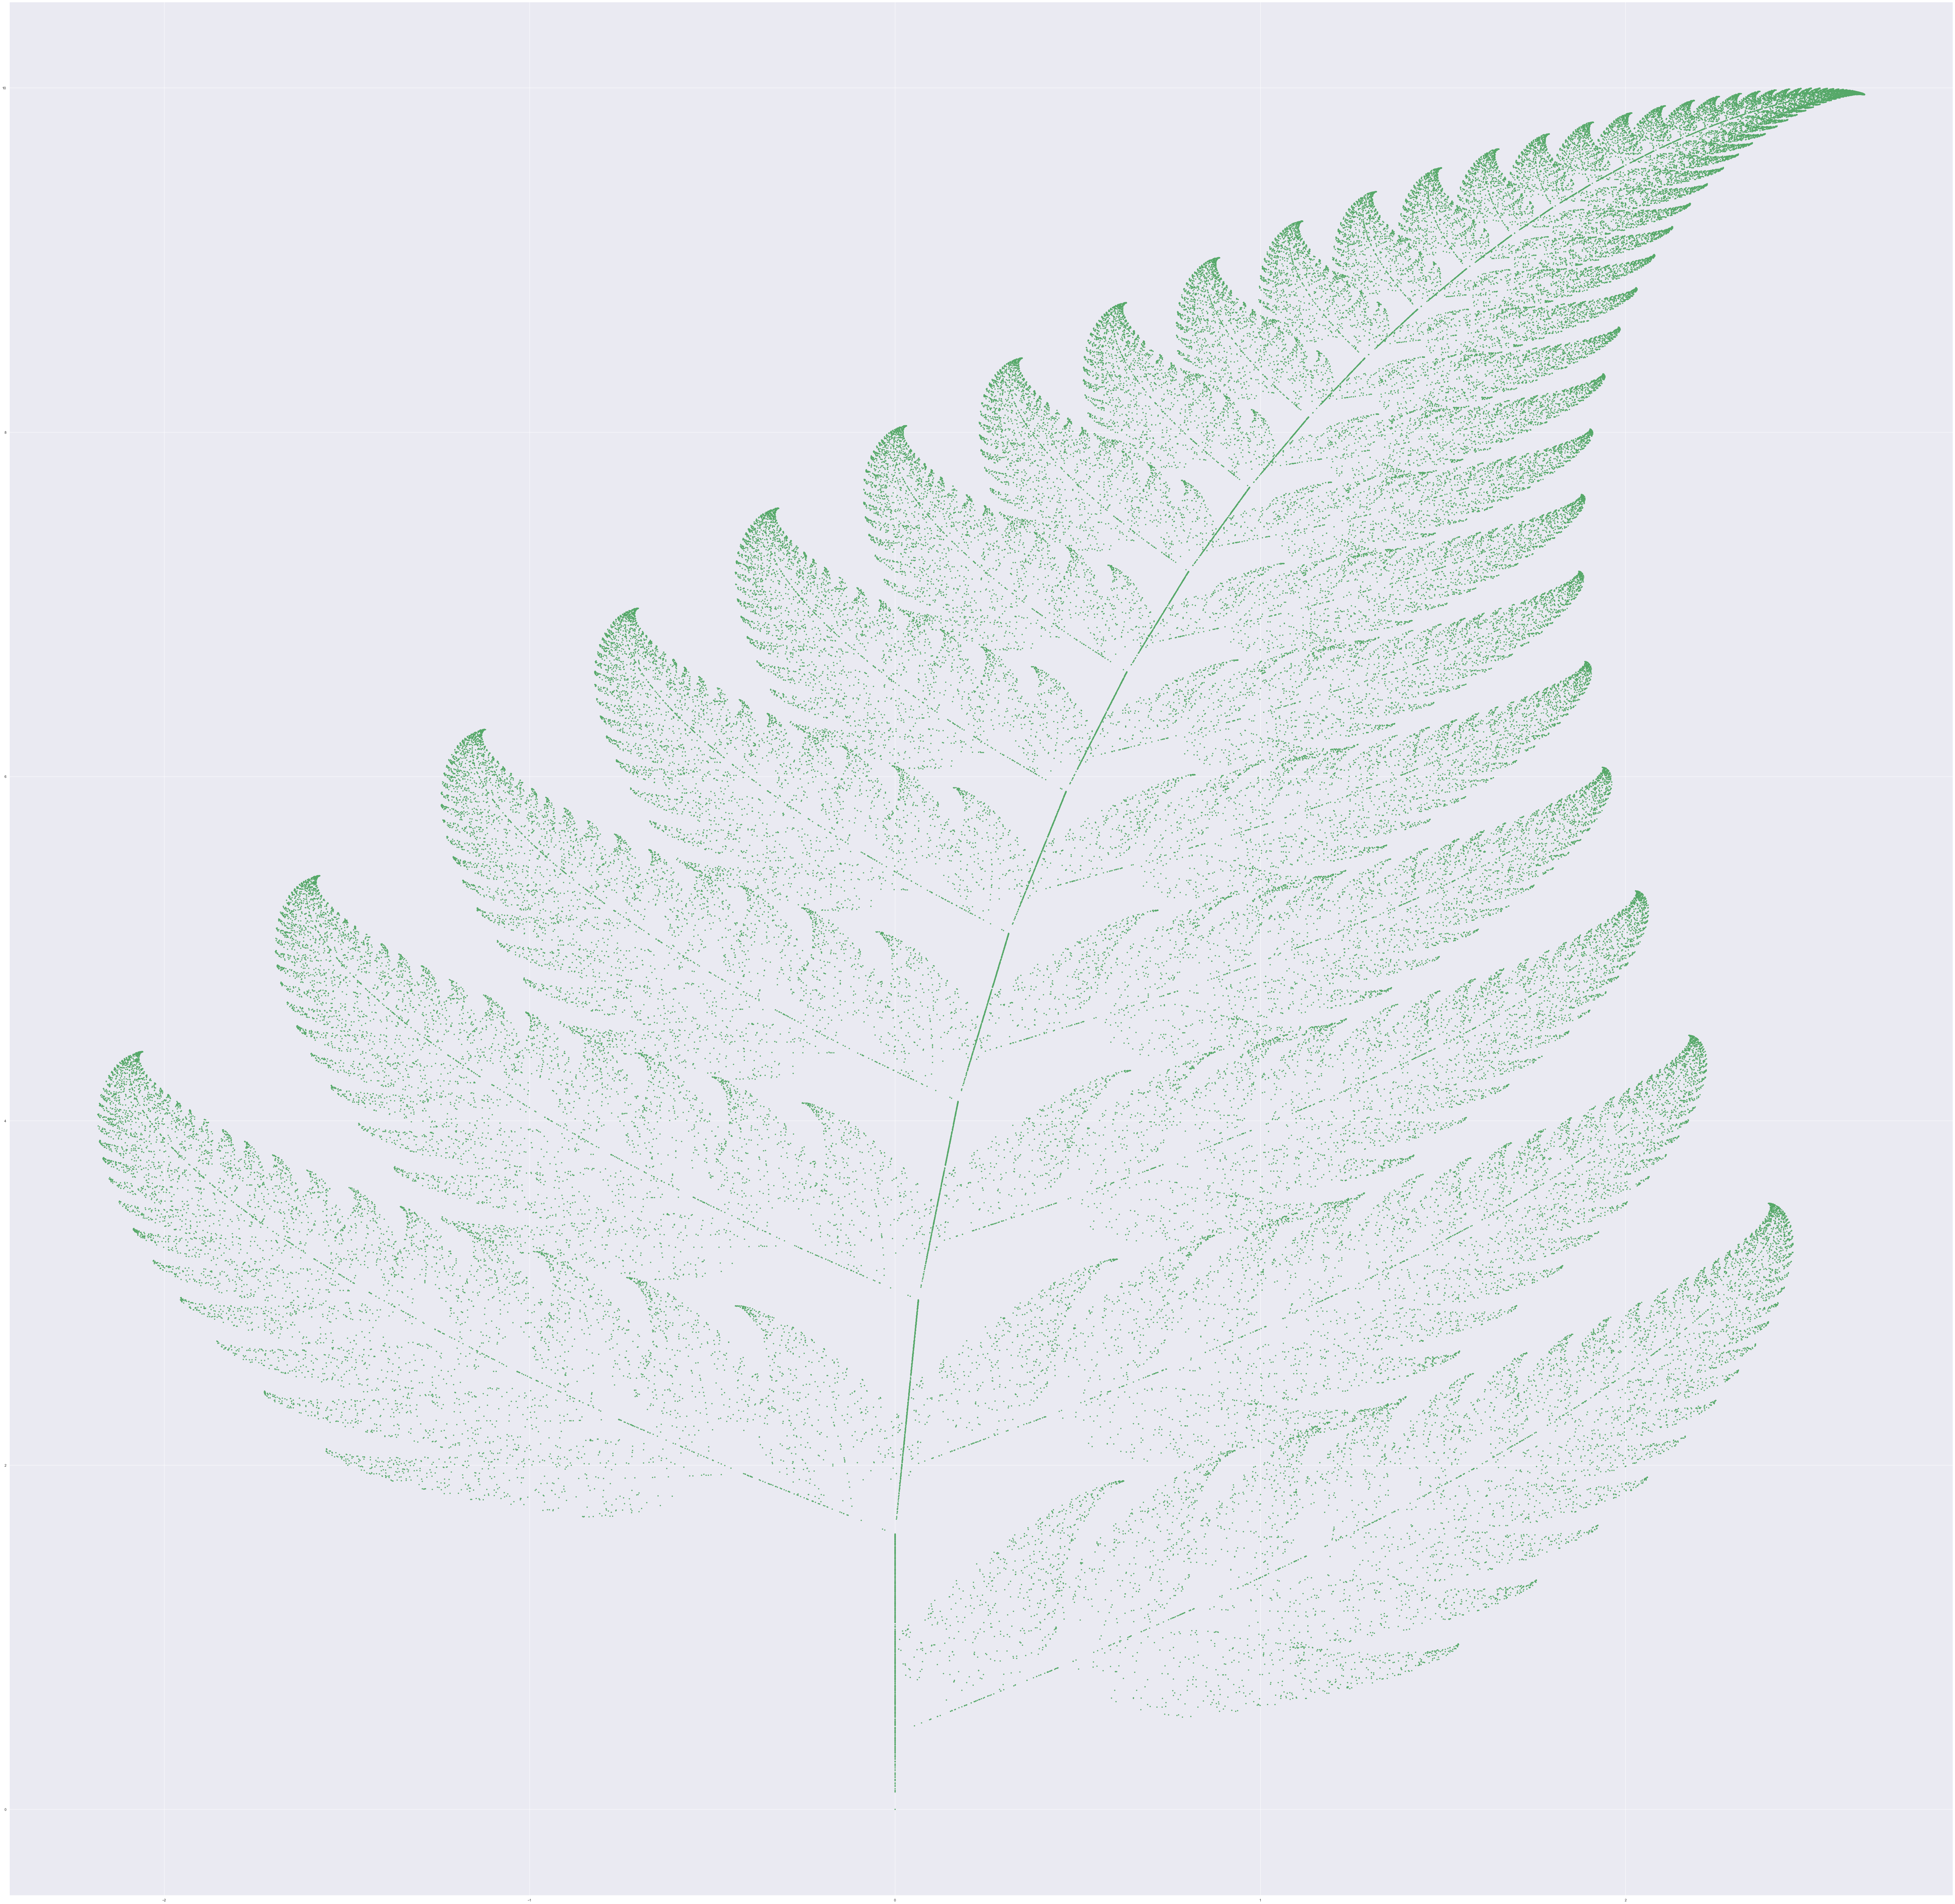

In [1]:


import matplotlib.pyplot as plt
import seaborn as sns
import random as random
%matplotlib inline
sns.set()
import random as random

x = 0
y = 0
X = [x]
Y = [y]
n=1
isprint = False
while n < 100800:
    r = random.uniform(0,100)
    if r <  1.0:
        x = 0
        y = 0.16*Y[n-1]
        X.append(x) ; Y.append(y)

    elif r > 1.0 and r < 86.0:
        x = 0.85*X[n-1] + 0.04*Y[n-1]
        y = -0.04*X[n-1] + 0.85*Y[n-1]+1.6
        X.append(x);Y.append(y)
    elif r > 86.0 and r < 93.0:
        x = 0.2*X[n-1] - 0.26*Y[n-1]
        y = 0.23*X[n-1] + 0.22*Y[n-1] + 1.6

        X.append(x);Y.append(y)

    elif r > 93.0 and r < 100.0:
        x = -0.15*X[n-1] + 0.28*Y[n-1]
        y = 0.26*X[n-1] + 0.24*Y[n-1] + 0.44

        X.append(x);Y.append(y)

    if isprint:
        print("step: ",n,"random number is: ", r, "coordinate is : ", x,y)

    n = n+1
plt.figure(figsize = [108,108])
plt.scatter(X,Y,color = 'g',marker = '.')
plt.show()

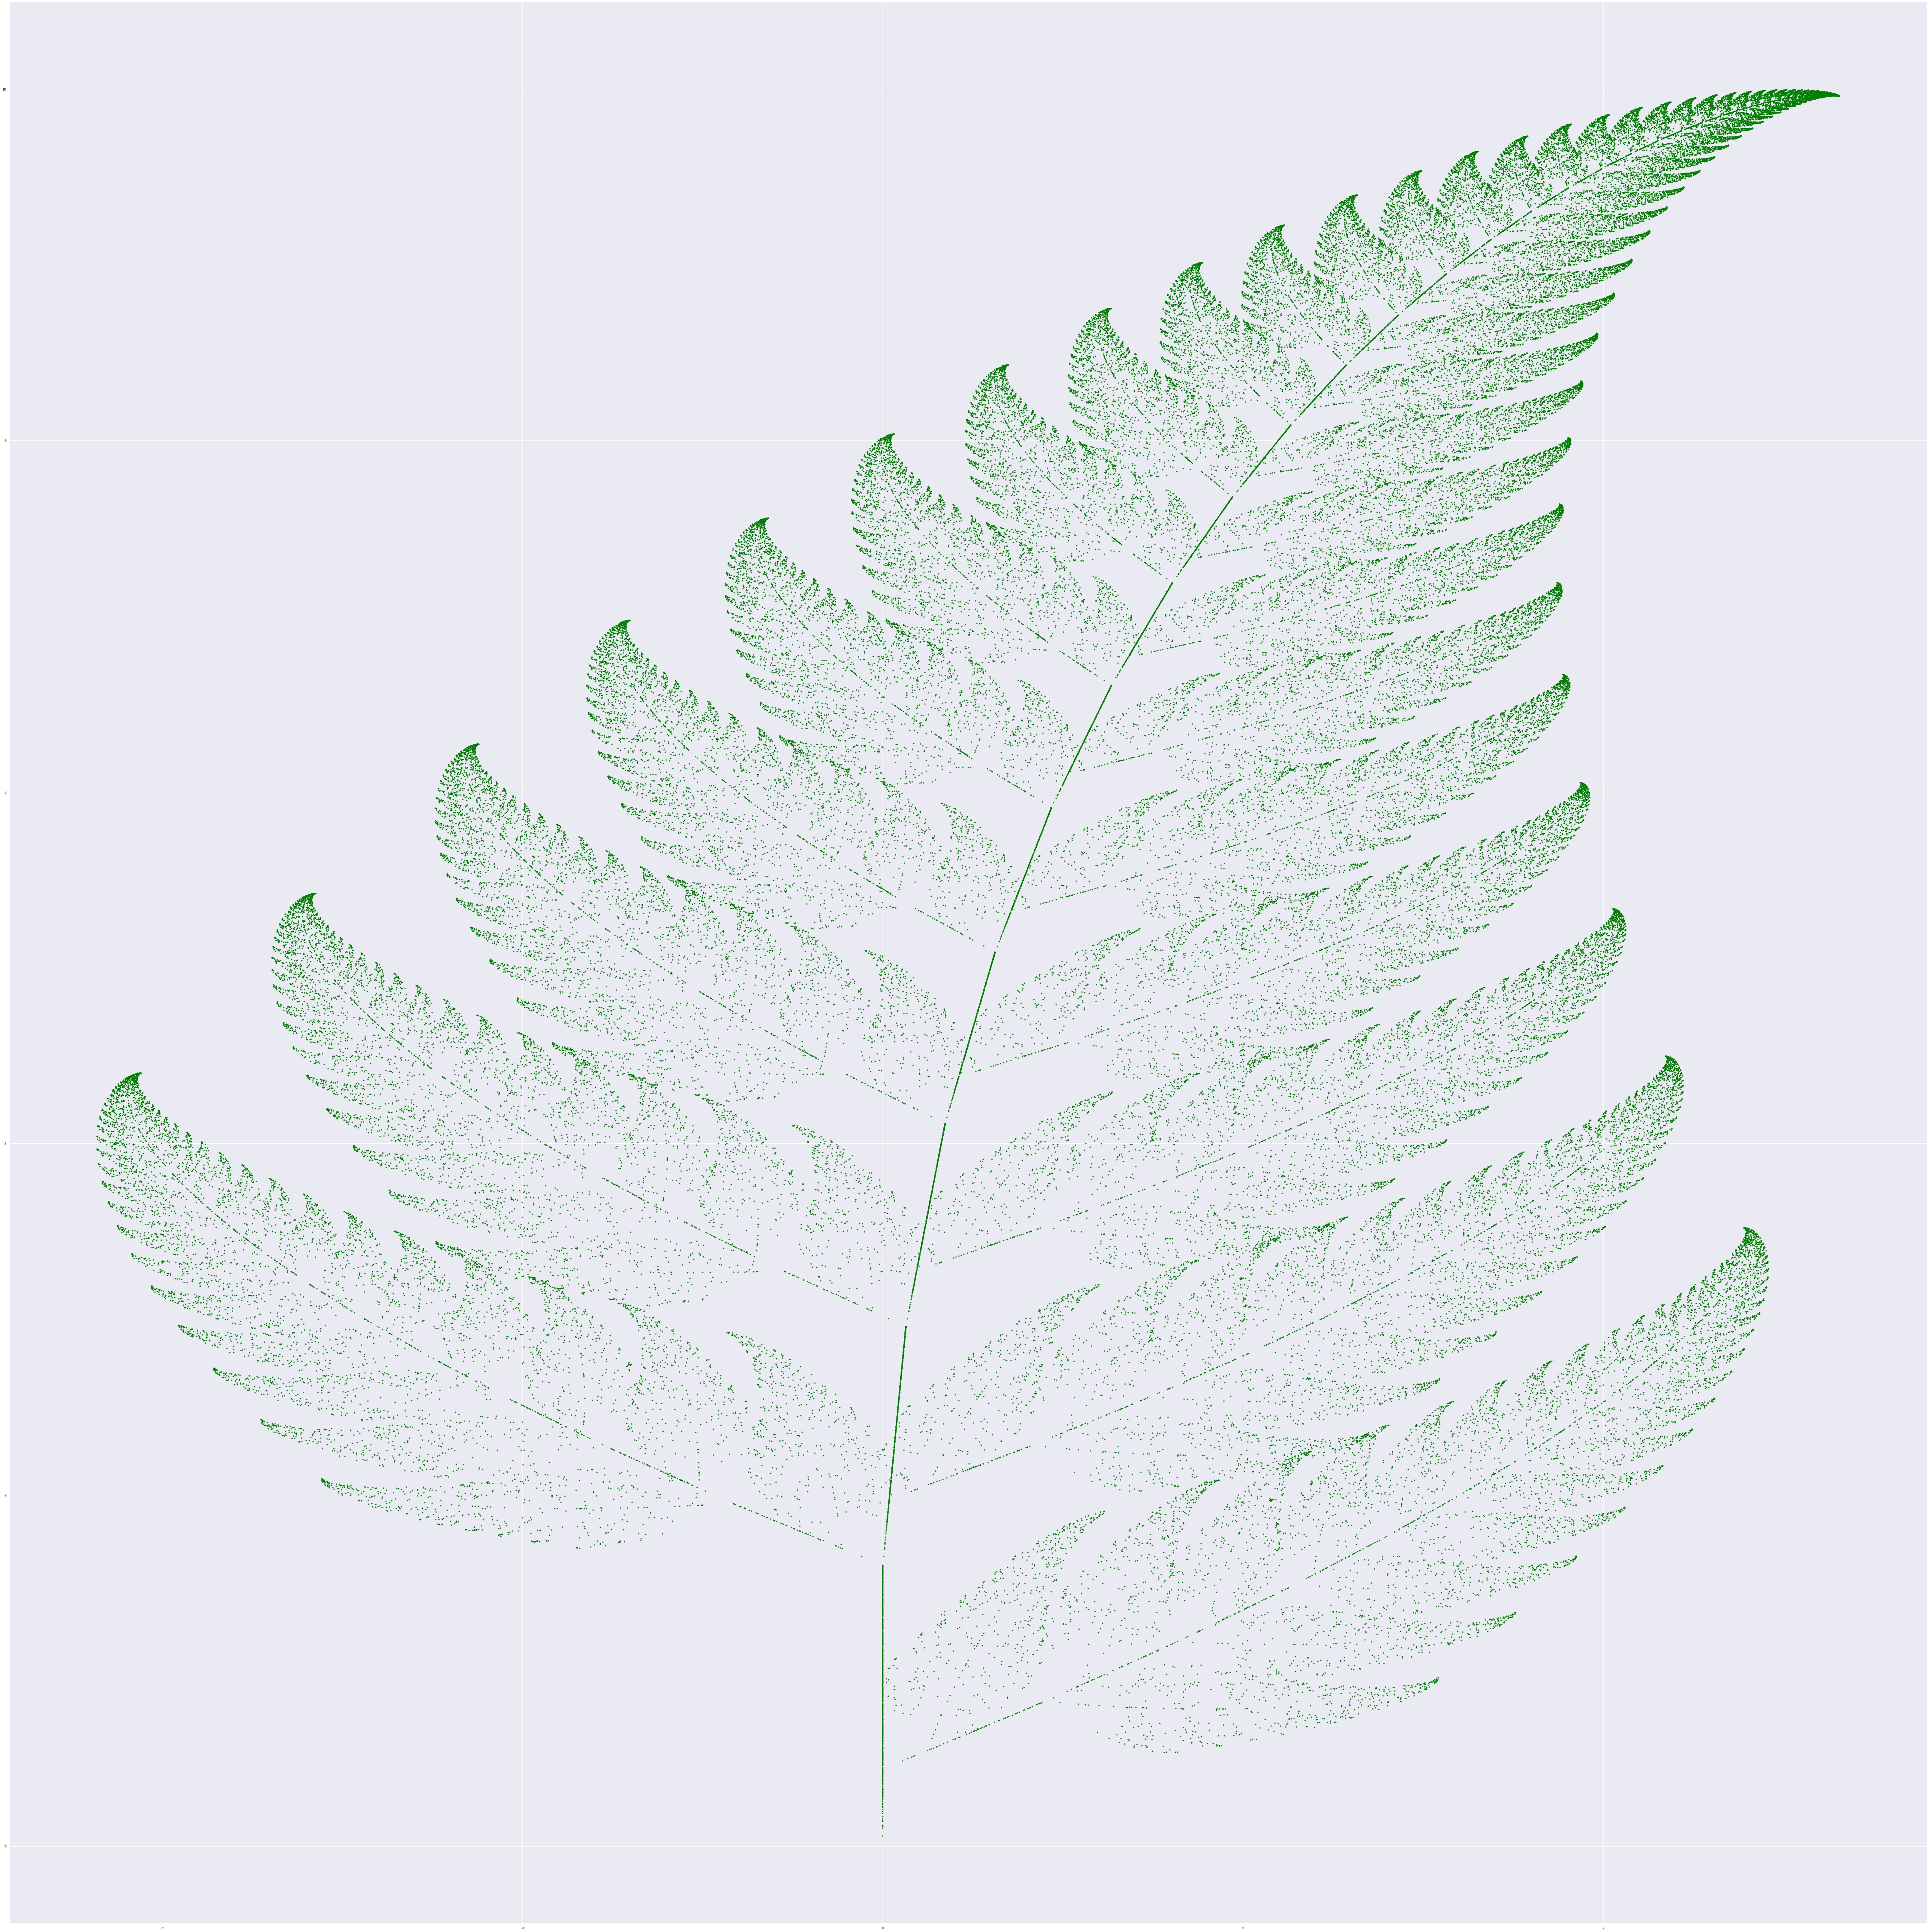

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
%matplotlib inline
sns.set()
import random as random

#To define number of iteration.
ITR = 100000

#To define matrices using numpy
x = np.array([[0.0,0.0] for k in range(ITR)])
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

#To implement transformation
X =[]
Y = []
x[0,0] = 0.0
x[0,1] = 0.0
t = 0
while t < ITR:
    ct = random.uniform(0,100)
    '''First condition'''
    if ct < 1.0:       
        for p in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + A[p,q]*x[t-1,q] 
        '''second condition'''            
    elif ct > 1.0 and ct < 86.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + B[p,q]*x[t-1,q]    
        for  p in range(2):
            x[t,p] = x[t,p]  + AD[1,p]
        '''third condition'''                 
    elif ct > 86.0 and ct < 93.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + C[p,q]*x[t-1,q]      
        for p in range(2):
            x[t,p] = x[t,p]  + AD[2,p]
        '''fourth condition '''                 
    elif  ct > 93.0 and ct < 100.0:
        for p in range(2):
            x[1,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + D[p,q]*x[t-1,q]       
        for p in range(2):
            x[t,p] = x[t,p]  + AD[3,p]

    X.append(x[t,0])
    Y.append(x[t,1])
    t = t +1
#To get the plot
plt.figure(figsize = [105,108])
plt.scatter(X,Y,color = 'green',marker = '.')
plt.show()